In [1]:
# Perform the standard numpy and units imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
# Set plot default figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import xray
import morticia.sensor.electro as electro
# This notebook is also used for development/testing of the electro module, so auto reload the electro module if it changes
%load_ext autoreload
%aimport morticia.sensor.electro
%autoreload 1

In [2]:
# Show a conversion of absolute spectral response to spectral quantum efficiency
asr = xray.DataArray([0.1, 0.3, 0.25, 0.1], [('wvl', [0.5, 0.6, 0.7, 0.8])], 
                     attrs={'asr_units': 'A/W', 'wvl_units': 'um'},
                     name='asr')

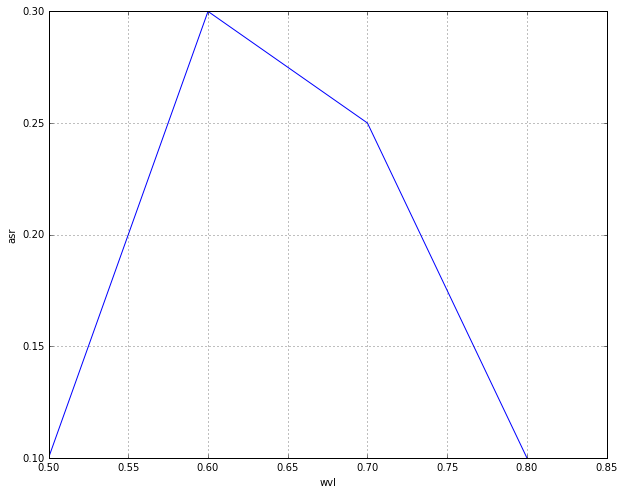

In [3]:
asr.plot()
plt.grid()

In [4]:
# Convert to spectral quantum efficiency (SQE)
sqe = electro.xd_asr2sqe(asr)

In [7]:
# Print out the DataArray
sqe

<xray.DataArray (wvl: 4)>
array([ 0.24796838,  0.61992095,  0.44280068,  0.15498024])
Coordinates:
  * wvl      (wvl) float64 500.0 600.0 700.0 800.0
Attributes:
    sqe_units: 
    wvl_units: nm

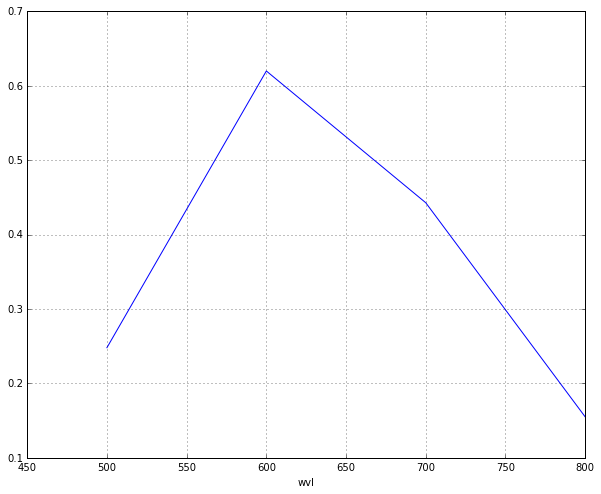

In [8]:
# Plot the spectral quantum efficiency
sqe.plot()
plt.grid()

In [9]:
# Read ASR data for the Hamamatsu S2281-04 detector
HamaS2281asrData = np.genfromtxt('data/fpa/HamamatsuS2281-04asr.csv', delimiter=',')


In [10]:
# Create a DataArray using the data read from the file
HamaS2281asr = xray.DataArray(HamaS2281asrData[:,1], [('wvl', HamaS2281asrData[:,0])],
                             name='asr',
                             attrs={'asr_units': 'A/W', 'wvl_units': 'nm'})

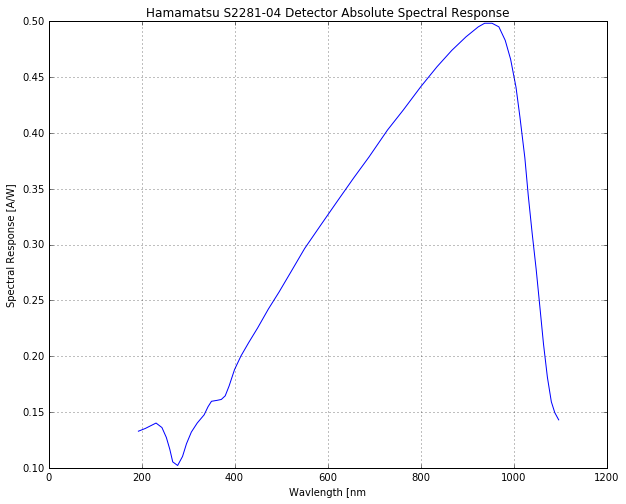

In [11]:
# Plot absolute spectral response of the Hamamatsu S2281-04 Detector
HamaS2281asr.plot()
plt.title('Hamamatsu S2281-04 Detector Absolute Spectral Response')
plt.xlabel('Wavlength [' + HamaS2281asr.attrs['wvl_units'])
plt.ylabel('Spectral Response [' + HamaS2281asr.attrs['asr_units'] + ']')
plt.grid()

In [12]:
# Convert to quantum efficiency
HamaS2281sqe = electro.xd_asr2sqe(HamaS2281asr)

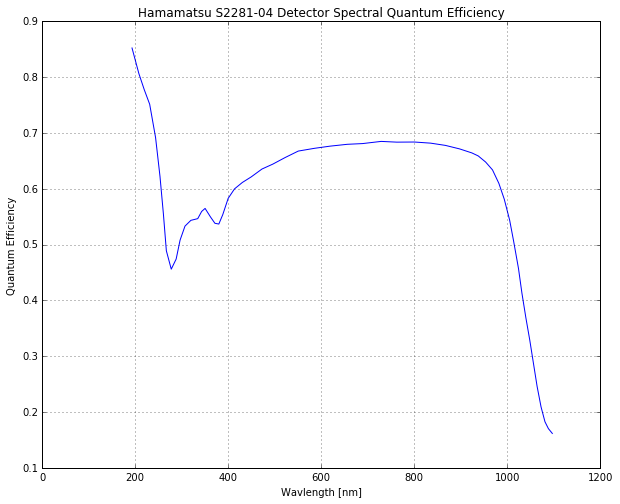

In [13]:
# PLot SQE
HamaS2281sqe.plot()
plt.title('Hamamatsu S2281-04 Detector Spectral Quantum Efficiency')
plt.xlabel('Wavlength [' + HamaS2281sqe.attrs['wvl_units'] + ']')
plt.ylabel('Quantum Efficiency')
plt.grid()